<a href="https://colab.research.google.com/github/o-rma/ML-FLASK-Pythonanywhere/blob/master/%E3%83%95%E3%82%A3%E3%83%AB%E3%82%BF%E3%83%BC%E5%9B%9E%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

CH1をinputに、CH2をoutputにして測定した

これを満たせばcsvのpathを変えるだけで図が作成できる

## setup

In [13]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

# setting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt_config = {
    "figure.dpi": 150,
    "font.size": 14,
    "figure.subplot.bottom": 0.15,
    "figure.subplot.left": 0.17,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "legend.framealpha": 1.0,
    "legend.edgecolor": "black",
    "legend.fancybox": False
}
plt.rcParams.update(plt_config)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


zipファイルの展開

In [15]:
# 日本語ファイル名が文字化けする場合の対策として、文字コードを指定してunzipを実行
# CP932 (Shift_JIS) を指定していますが、必要に応じて他の文字コード (例: UTF-8) を試してください。
!unzip -O CP932 -q "/content/drive/MyDrive/Filter.zip" -d $(dirname "/content/drive/MyDrive/Filter.zip")

###zipファイルのディレクトリ構成

下記zipファイルをGoogle Driveの`MyDrive/Experiment/Filter/`直下に展開した。

- 結果.zip  
  - 使用物品.txt  
  - 6.1方形波の入出力/  
    - LC/  
      - measdata1 lc in.csv  
      - measdata1 lc out.csv  
      - LC　出力FFT/  
        - A0001.CSV  
        - A0001.PNG  
        - A0001.SET  
      - LC　入力FFT/  
        - A0001.CSV  
        - A0001.PNG  
        - A0001.SET  
      - LC　波形/  
        - A0001.CSV  
        - A0001.PNG  
        - A0001.SET  
    - RC/  
      - measdata1 rc in1.csv  
      - measdata1 rc out.csv  
      - RC　出力FFT/  
        - A0001.CSV  
        - A0001.PNG  
        - A0001.SET  
      - RC　入力FFT/  
        - A0001.CSV  
        - A0001.PNG  
        - A0001.SET  
      - RC　波形/  
        - A0001.CSV  
        - A0001.PNG  
        - A0001.SET  
    - RL/  
      - measdata1 rl in.csv  
      - measdata1 rl out.csv  
      - RL　出力FFT/  
        - A0001.CSV  
        - A0001.PNG  
        - A0001.SET  
      - RL　入力FFT/  
        - A0001.CSV  
        - A0001.PNG  
        - A0001.SET  
      - RL　波形/  
        - A0001.CSV  
        - A0001.PNG  
        - A0001.SET  
  - 6.2定K形フィルタにおける負荷の影響/  
    - 小（458.6）/  
      - A0001.CSV  
      - A0001.PNG  
      - A0001.SET  
    - 大（6458.6）/  
      - A0001.CSV  
      - A0001.PNG  
      - A0001.SET  
    - 同（1458.6）/  
      - A0001.CSV  
      - A0001.PNG  
      - A0001.SET  
  - 6.3周波数特性の測定/  
    - LC 0458.CSV  
    - LC 1458.CSV  
    - LC 6458.CSV  
    - RC.CSV  
    - RL.CSV  


# 6.1

FFTのCSVに関して;

4列目:周波数

5列目:利得

(0行目スタート)

## LC

FFT

ノイズ低減のため、5点の移動平均処理を適用

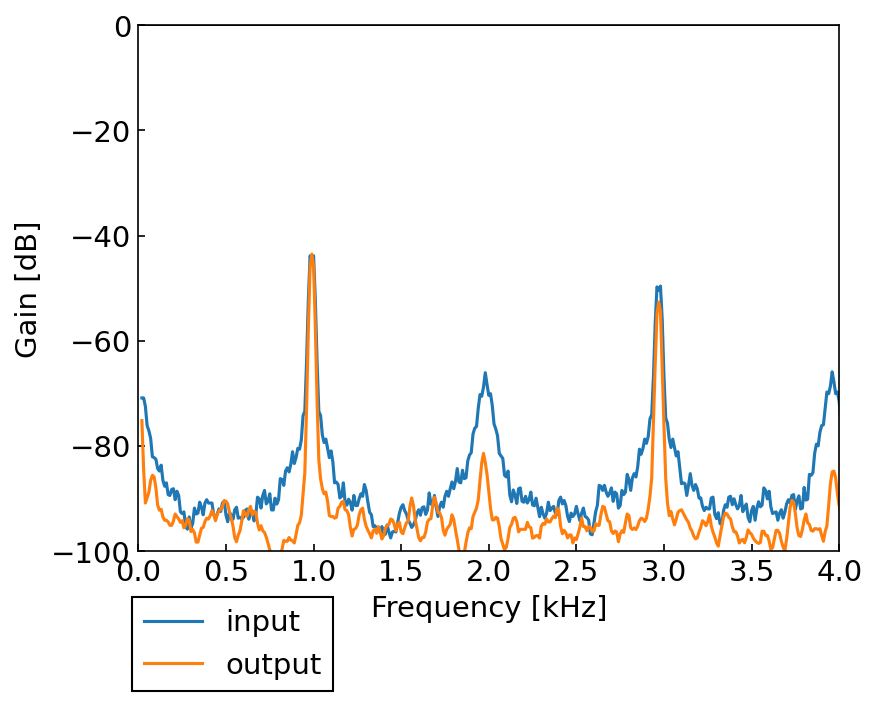

In [17]:
# データのCSVを見て、必要な部分（25行目よりあと、[0, 1, 3]列）を使う
filepath_in ="/content/drive/MyDrive/Filter/6.1方形波の入出力/LC/LC　入力FFT/A0001.CSV"
filepath_out ="/content/drive/MyDrive/Filter/6.1方形波の入出力/LC/LC　出力FFT/A0001.CSV"

data_in = np.loadtxt(filepath_in, delimiter=',', skiprows=26, usecols=[4, 5], max_rows=4999)
data_out = np.loadtxt(filepath_out, delimiter=',', skiprows=26, usecols=[4, 5], max_rows=4999)

# gainの列（data[:, 1]）をデシベルに変換
# data[:, 1] = 20 * np.log10(data[:, 1])

# 分かりやすいように変数に代入しておく
freq = data_in[:, 0] * 0.001 # 単位を[kHz]にする

df_in = pd.DataFrame(data_in, columns=["freq", "gain"])
df_out = pd.DataFrame(data_out, columns=["freq", "gain"])

#平均をとる
df_in["gain_rolling_mean"] = df_in["gain"].rolling(window=5, center=True).mean()
df_out["gain_rolling_mean"] = df_out["gain"].rolling(window=5, center=True).mean()

# プロット
plt.plot(freq, df_in["gain_rolling_mean"], label="input")
plt.plot(freq, df_out["gain_rolling_mean"], label="output")

# x軸、y軸のラベルをつける
plt.xlabel("Frequency [kHz]")
plt.ylabel("Gain [dB]")

# x, y軸の範囲を指定
plt.ylim(-100,0)
plt.xlim(0,4)

# x軸の線を表示
plt.axhline(0, color='black', linewidth=0.90)

# 凡例を含めて表示
plt.legend(bbox_to_anchor=(-0.03,-0.06), loc='upper left')
plt.show()

波形

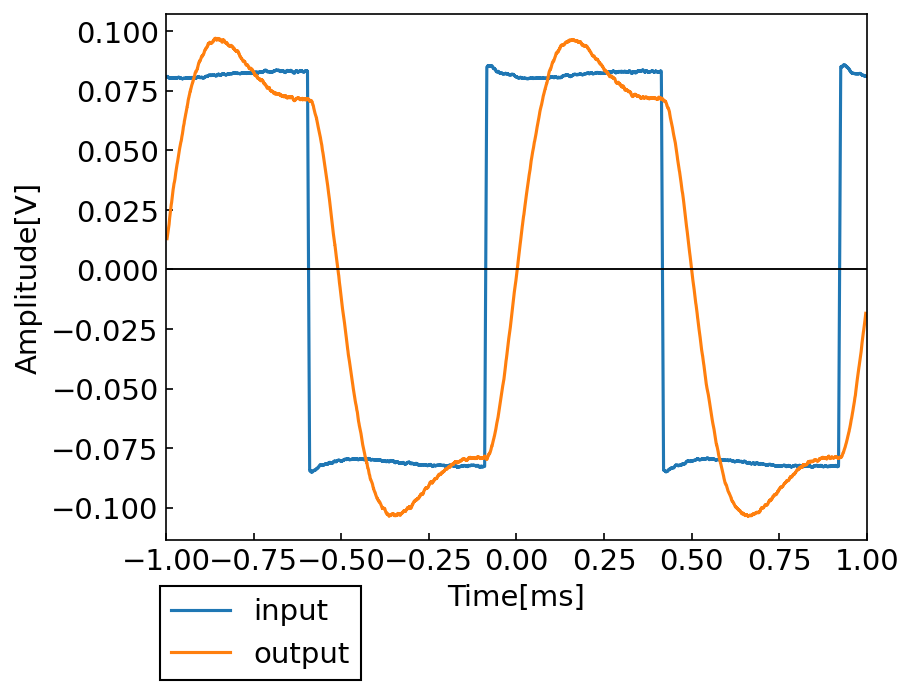

In [18]:
# データのCSVを見て、必要な部分（25行目よりあと、[0, 1, 3]列）を使う
filepath ="/content/drive/MyDrive/Filter/6.1方形波の入出力/LC/LC　波形/A0001.CSV"

data = np.loadtxt(filepath, delimiter=',', skiprows=26, usecols=[0, 1, 3])

# 分かりやすいように変数に代入しておく(Timeは共通)
time = data[:, 0] * 1000 # 単位を[ms]にする

df = pd.DataFrame(data, columns=["time", "in", "out"])

#平均をとる
df["in_rolling_mean"] = df["in"].rolling(window=30, center=True).mean()
df["out_rolling_mean"] = df["out"].rolling(window=30, center=True).mean()

# プロット
#plt.plot(time, ei, label="$e_{i}$")
#plt.plot(time, eo, label="$e_{o}$")
plt.plot(time, df["in_rolling_mean"], label="input")
plt.plot(time, df["out_rolling_mean"], label="output")

# x軸、y軸のラベルをつける
plt.xlabel("Time[ms]")
plt.ylabel("Amplitude[V]")

# x, y軸の範囲を指定
#plt.ylim(-0.7,0.7)
plt.xlim(-1,1)

# x軸の線を表示
plt.axhline(0, color='black', linewidth=0.90)

# 凡例を含めて表示
plt.legend(bbox_to_anchor=(-0.03,-0.06), loc='upper left')
plt.show()

スペアナたそ

ノイズ低減のため、5点の移動平均処理を適用

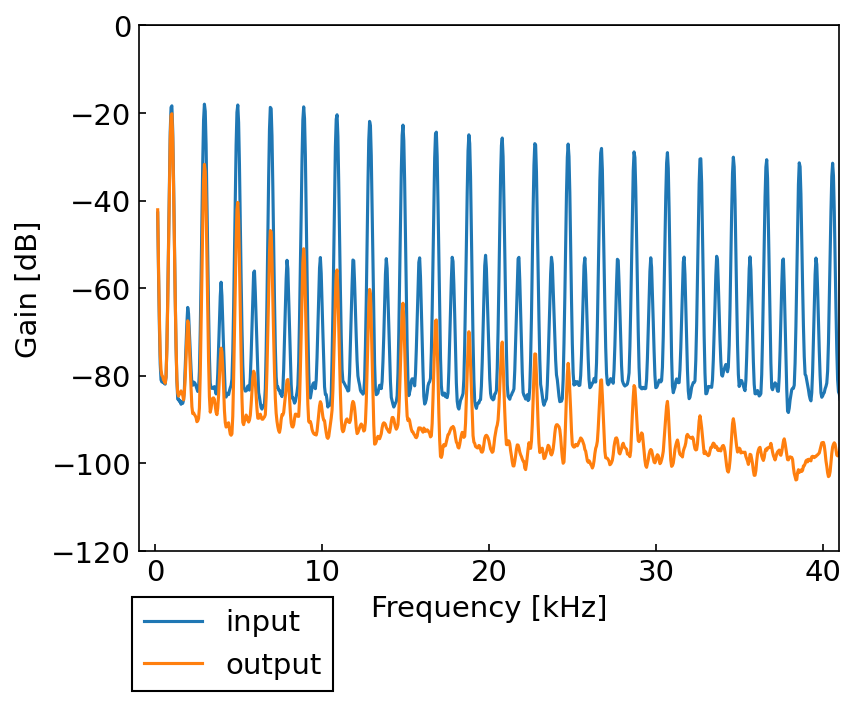

In [19]:
filepath_in ="/content/drive/MyDrive/Filter/6.1方形波の入出力/LC/measdata1 lc in.csv"
filepath_out ="/content/drive/MyDrive/Filter/6.1方形波の入出力/LC/measdata1 lc out.csv"

data_in = np.loadtxt(filepath_in, delimiter=',', skiprows=33, usecols=[0, 1])
data_out = np.loadtxt(filepath_out, delimiter=',', skiprows=33, usecols=[0, 1])

# 分かりやすいように変数に代入しておく(Timeは共通)
freq = data_in[:, 0] * 0.001 # 単位を[kHz]にする

df_in = pd.DataFrame(data_in, columns=["freq", "gain"])
df_out = pd.DataFrame(data_out, columns=["freq", "gain"])

#平均をとる
df_in["gain_rolling_mean"] = df_in["gain"].rolling(window=5, center=True).mean()
df_out["gain_rolling_mean"] = df_out["gain"].rolling(window=5, center=True).mean()

# プロット
plt.plot(freq, df_in["gain_rolling_mean"], label="input")
plt.plot(freq, df_out["gain_rolling_mean"], label="output")

# x軸、y軸のラベルをつける
plt.xlabel("Frequency [kHz]")
plt.ylabel("Gain [dB]")

# x, y軸の範囲を指定
plt.ylim(-120,0)
plt.xlim(-1,41)

# x軸の線を表示
plt.axhline(0, color='black', linewidth=0.90)

# 凡例を含めて表示
plt.legend(bbox_to_anchor=(-0.03,-0.06), loc='upper left')
plt.show()

## RC

FFT

ノイズ低減のため、5点の移動平均処理を適用

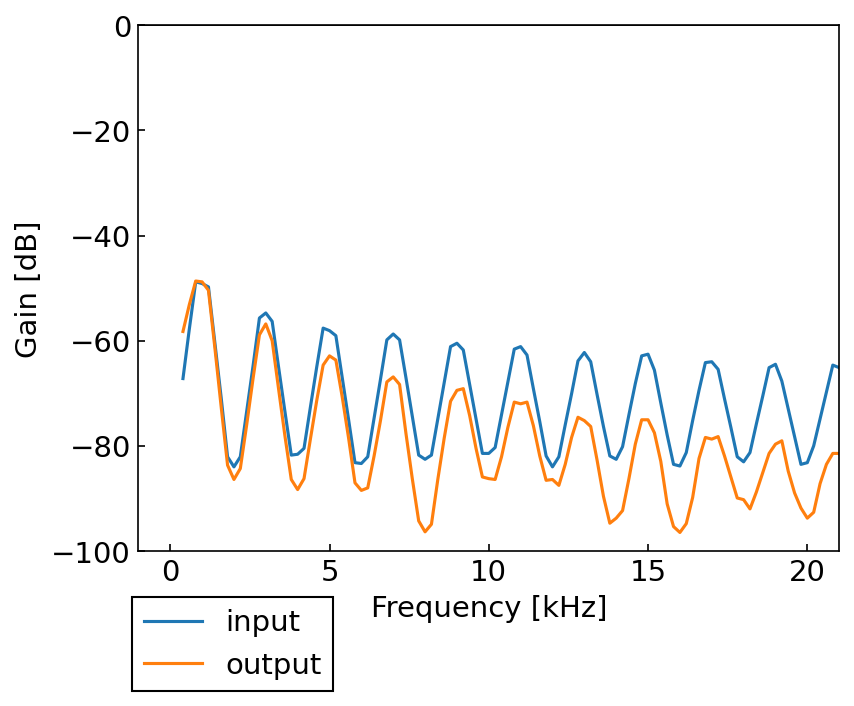

In [20]:
# データのCSVを見て、必要な部分（25行目よりあと、[0, 1, 3]列）を使う
filepath_in ="/content/drive/MyDrive/Filter/6.1方形波の入出力/RC/RC　入力FFT/A0001.CSV"
filepath_out ="/content/drive/MyDrive/Filter/6.1方形波の入出力/RC/RC　出力FFT/A0001.CSV"

data_in = np.loadtxt(filepath_in, delimiter=',', skiprows=26, usecols=[4, 5], max_rows=4999)
data_out = np.loadtxt(filepath_out, delimiter=',', skiprows=26, usecols=[4, 5], max_rows=4999)

# gainの列（data[:, 1]）をデシベルに変換
# data[:, 1] = 20 * np.log10(data[:, 1])

# 分かりやすいように変数に代入しておく
freq = data_in[:, 0] * 0.001 # 単位を[kHz]にする

df_in = pd.DataFrame(data_in, columns=["freq", "gain"])
df_out = pd.DataFrame(data_out, columns=["freq", "gain"])

#平均をとる
df_in["gain_rolling_mean"] = df_in["gain"].rolling(window=5, center=True).mean()
df_out["gain_rolling_mean"] = df_out["gain"].rolling(window=5, center=True).mean()

# プロット
plt.plot(freq, df_in["gain_rolling_mean"], label="input")
plt.plot(freq, df_out["gain_rolling_mean"], label="output")

# x軸、y軸のラベルをつける
plt.xlabel("Frequency [kHz]")
plt.ylabel("Gain [dB]")

# x, y軸の範囲を指定
plt.ylim(-100,0)
plt.xlim(-1,21)

# x軸の線を表示
plt.axhline(0, color='black', linewidth=0.90)

# 凡例を含めて表示
plt.legend(bbox_to_anchor=(-0.03,-0.06), loc='upper left')
plt.show()

波形

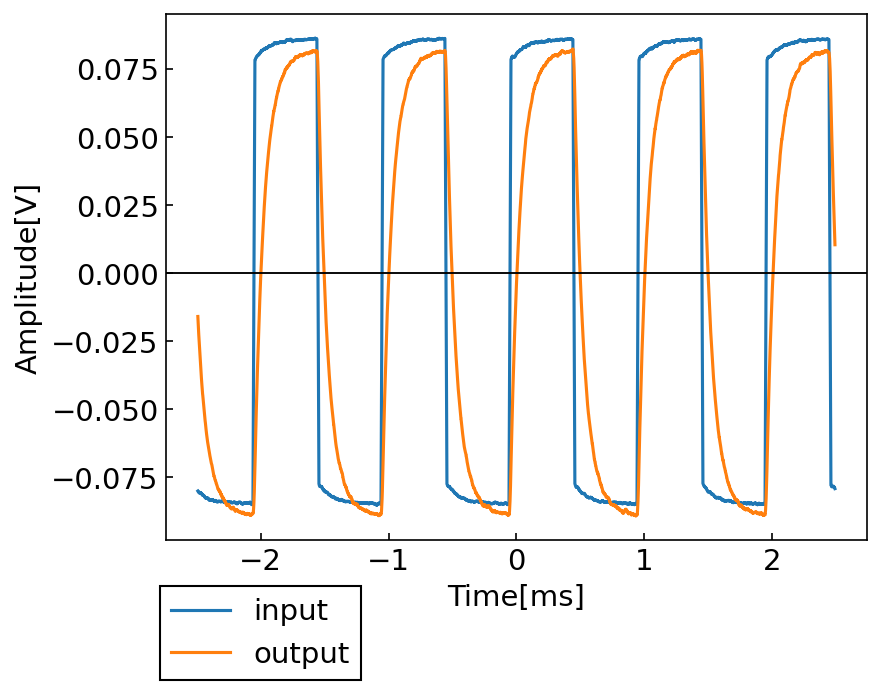

In [21]:
# データのCSVを見て、必要な部分（25行目よりあと、[0, 1, 3]列）を使う
filepath ="/content/drive/MyDrive/Filter/6.1方形波の入出力/RC/RC　波形/A0001.CSV"

data = np.loadtxt(filepath, delimiter=',', skiprows=26, usecols=[0, 1, 3])

# 分かりやすいように変数に代入しておく(Timeは共通)
time = data[:, 0] * 1000 # 単位を[ms]にする

df = pd.DataFrame(data, columns=["time", "in", "out"])

#平均をとる
df["in_rolling_mean"] = df["in"].rolling(window=30, center=True).mean()
df["out_rolling_mean"] = df["out"].rolling(window=30, center=True).mean()

# プロット
#plt.plot(time, ei, label="$e_{i}$")
#plt.plot(time, eo, label="$e_{o}$")
plt.plot(time, df["in_rolling_mean"], label="input")
plt.plot(time, df["out_rolling_mean"], label="output")

# x軸、y軸のラベルをつける
plt.xlabel("Time[ms]")
plt.ylabel("Amplitude[V]")

# x, y軸の範囲を指定
#plt.ylim(-0.7,0.7)
#plt.xlim(-1,4)

# x軸の線を表示
plt.axhline(0, color='black', linewidth=0.90)

# 凡例を含めて表示
plt.legend(bbox_to_anchor=(-0.03,-0.06), loc='upper left')
plt.show()

スペアナたそ

ノイズ低減のため、5点の移動平均処理を適用

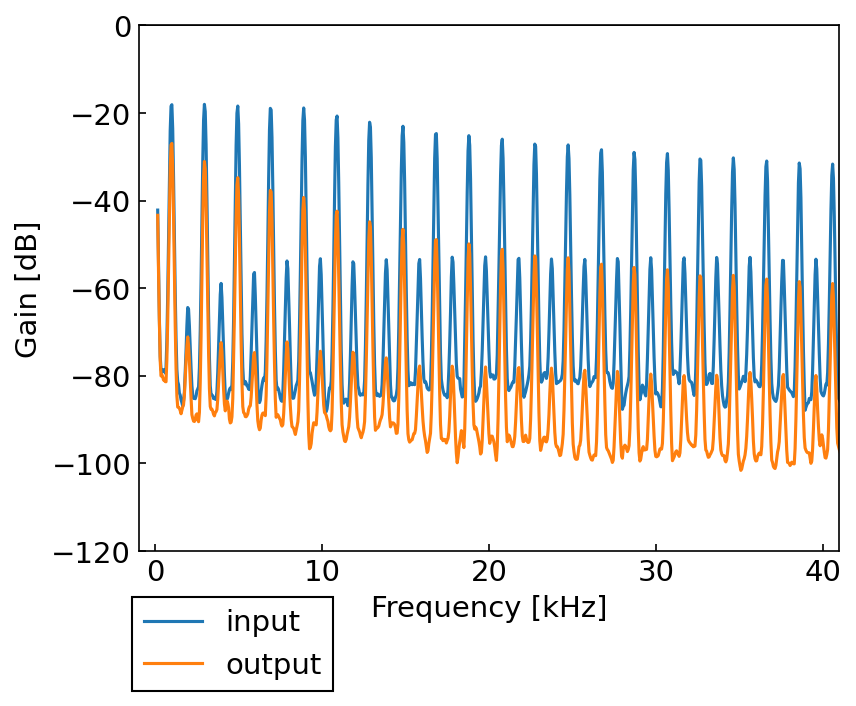

In [22]:
filepath_in ="/content/drive/MyDrive/Filter/6.1方形波の入出力/RC/measdata1 rc in.csv"
filepath_out ="/content/drive/MyDrive/Filter/6.1方形波の入出力/RC/measdata1 rc out.csv"

data_in = np.loadtxt(filepath_in, delimiter=',', skiprows=33, usecols=[0, 1])
data_out = np.loadtxt(filepath_out, delimiter=',', skiprows=33, usecols=[0, 1])

# 分かりやすいように変数に代入しておく(Timeは共通)
freq = data_in[:, 0] * 0.001 # 単位を[kHz]にする

df_in = pd.DataFrame(data_in, columns=["freq", "gain"])
df_out = pd.DataFrame(data_out, columns=["freq", "gain"])

#平均をとる
df_in["gain_rolling_mean"] = df_in["gain"].rolling(window=5, center=True).mean()
df_out["gain_rolling_mean"] = df_out["gain"].rolling(window=5, center=True).mean()

# プロット
plt.plot(freq, df_in["gain_rolling_mean"], label="input")
plt.plot(freq, df_out["gain_rolling_mean"], label="output")
# x軸、y軸のラベルをつける
plt.xlabel("Frequency [kHz]")
plt.ylabel("Gain [dB]")

# x, y軸の範囲を指定
plt.ylim(-120,0)
plt.xlim(-1,41)

# x軸の線を表示
plt.axhline(0, color='black', linewidth=0.90)

# 凡例を含めて表示
plt.legend(bbox_to_anchor=(-0.03,-0.06), loc='upper left')
plt.show()

## RL

FFT

ノイズ低減のため、5点の移動平均処理を適用

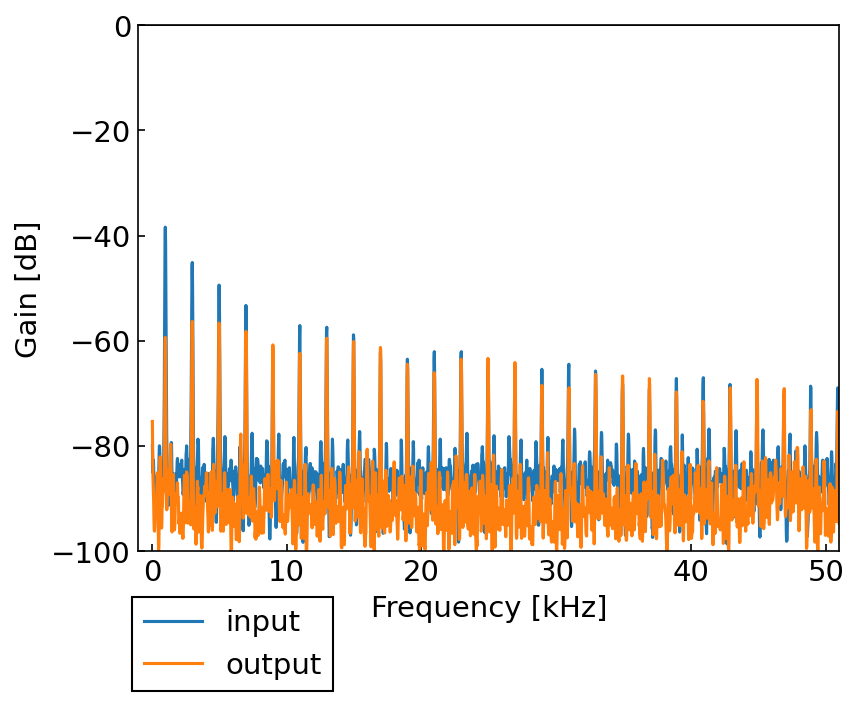

In [23]:
# データのCSVを見て、必要な部分（25行目よりあと、[4, 5]列）を使う
filepath_in ="/content/drive/MyDrive/Filter/6.1方形波の入出力/RL/RL　入力FFT/A0001.CSV"
filepath_out ="/content/drive/MyDrive/Filter/6.1方形波の入出力/RL/RL　出力FFT/A0001.CSV"

data_in = np.loadtxt(filepath_in, delimiter=',', skiprows=26, usecols=[4, 5], max_rows=4999)
data_out = np.loadtxt(filepath_out, delimiter=',', skiprows=26, usecols=[4, 5], max_rows=4999)

# gainの列（data[:, 1]）をデシベルに変換
# data[:, 1] = 20 * np.log10(data[:, 1])

# 分かりやすいように変数に代入しておく
freq = data_in[:, 0] * 0.001 # 単位を[kHz]にする

df_in = pd.DataFrame(data_in, columns=["freq", "gain"])
df_out = pd.DataFrame(data_out, columns=["freq", "gain"])

#平均をとる
df_in["gain_rolling_mean"] = df_in["gain"].rolling(window=5, center=True).mean()
df_out["gain_rolling_mean"] = df_out["gain"].rolling(window=5, center=True).mean()

# プロット
plt.plot(freq, df_in["gain_rolling_mean"], label="input")
plt.plot(freq, df_out["gain_rolling_mean"], label="output")

# x軸、y軸のラベルをつける
plt.xlabel("Frequency [kHz]")
plt.ylabel("Gain [dB]")

# x, y軸の範囲を指定
plt.ylim(-100,0)
plt.xlim(-1,51)

# x軸の線を表示
plt.axhline(0, color='black', linewidth=0.90)

# 凡例を含めて表示
plt.legend(bbox_to_anchor=(-0.03,-0.06), loc='upper left')
plt.show()

波形

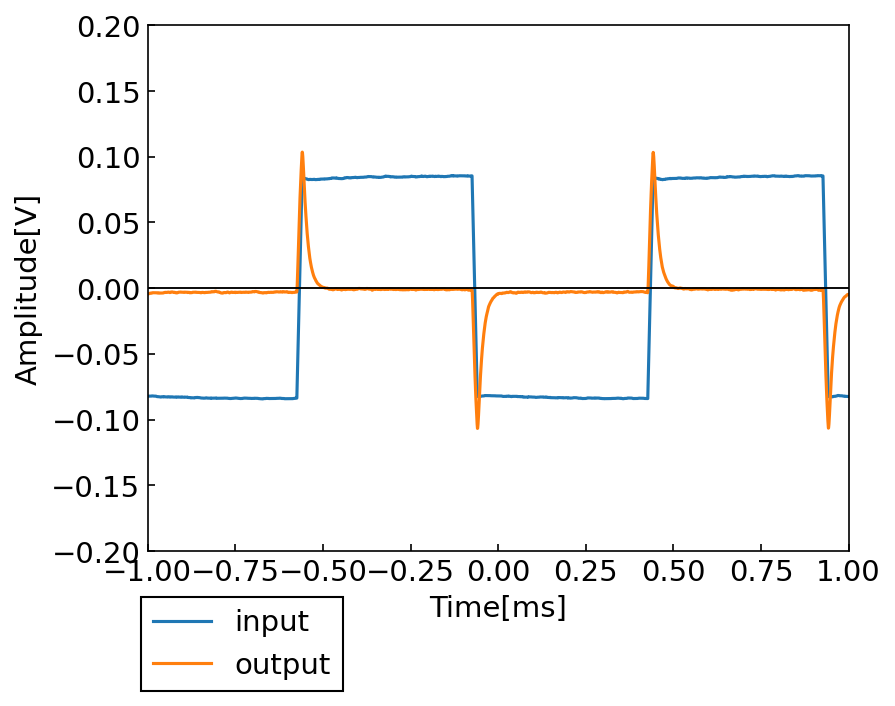

In [24]:
# データのCSVを見て、必要な部分（25行目よりあと、[0, 1, 3]列）を使う
filepath ="/content/drive/MyDrive/Filter/6.1方形波の入出力/RL/RL　波形/A0001.CSV"

data = np.loadtxt(filepath, delimiter=',', skiprows=26, usecols=[0, 1, 3])

# 分かりやすいように変数に代入しておく(Timeは共通)
time = data[:, 0] * 1000 # 単位を[ms]にする

df = pd.DataFrame(data, columns=["time", "in", "out"])

#平均をとる
df["in_rolling_mean"] = df["in"].rolling(window=30, center=True).mean()
df["out_rolling_mean"] = df["out"].rolling(window=30, center=True).mean()

# プロット
#plt.plot(time, ei, label="$e_{i}$")
#plt.plot(time, eo, label="$e_{o}$")
plt.plot(time, df["in_rolling_mean"], label="input")
plt.plot(time, df["out_rolling_mean"], label="output")

# x軸、y軸のラベルをつける
plt.xlabel("Time[ms]")
plt.ylabel("Amplitude[V]")

# x, y軸の範囲を指定
plt.ylim(-0.2,0.2)
plt.xlim(-1,1)

# x軸の線を表示
plt.axhline(0, color='black', linewidth=0.90)

# 凡例を含めて表示
plt.legend(bbox_to_anchor=(-0.03,-0.06), loc='upper left')
plt.show()

スペアナたそ

ノイズ低減のため、5点の移動平均処理を適用

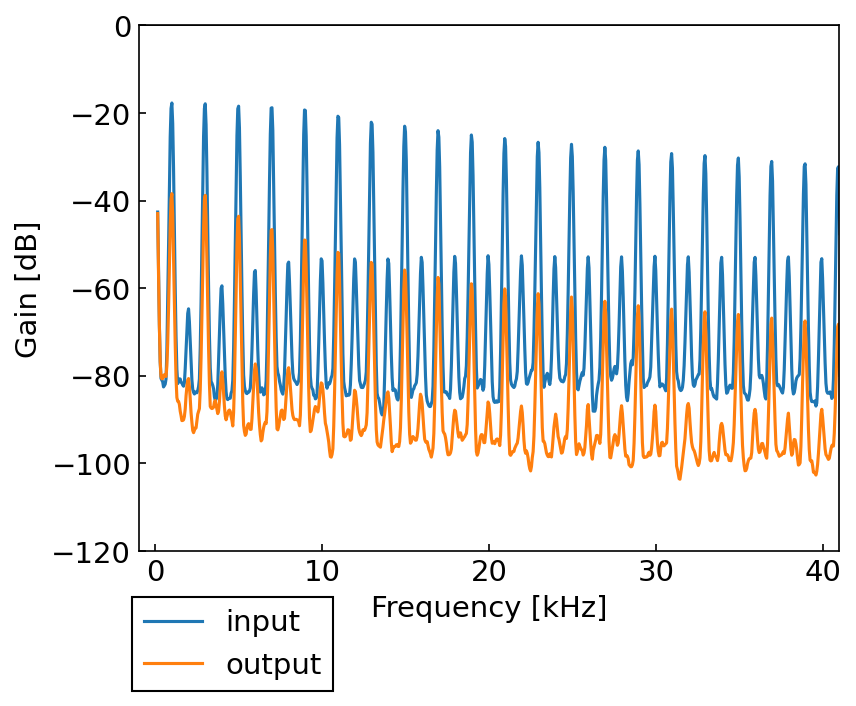

In [25]:
filepath_in ="/content/drive/MyDrive/Filter/6.1方形波の入出力/RL/measdata1 rl in.csv"
filepath_out ="/content/drive/MyDrive/Filter/6.1方形波の入出力/RL/measdata1 rl out.csv"

data_in = np.loadtxt(filepath_in, delimiter=',', skiprows=33, usecols=[0, 1])
data_out = np.loadtxt(filepath_out, delimiter=',', skiprows=33, usecols=[0, 1])

# 分かりやすいように変数に代入しておく(Timeは共通)
freq = data_in[:, 0] * 0.001 # 単位を[kHz]にする

df_in = pd.DataFrame(data_in, columns=["freq", "gain"])
df_out = pd.DataFrame(data_out, columns=["freq", "gain"])

#平均をとる
df_in["gain_rolling_mean"] = df_in["gain"].rolling(window=5, center=True).mean()
df_out["gain_rolling_mean"] = df_out["gain"].rolling(window=5, center=True).mean()

# プロット
plt.plot(freq, df_in["gain_rolling_mean"], label="input")
plt.plot(freq, df_out["gain_rolling_mean"], label="output")

# x軸、y軸のラベルをつける
plt.xlabel("Frequency [kHz]")
plt.ylabel("Gain [dB]")

# x, y軸の範囲を指定
plt.ylim(-120,0)
plt.xlim(-1,41)

# x軸の線を表示
plt.axhline(0, color='black', linewidth=0.90)

# 凡例を含めて表示
plt.legend(bbox_to_anchor=(-0.03,-0.06), loc='upper left')
plt.show()

#6.2

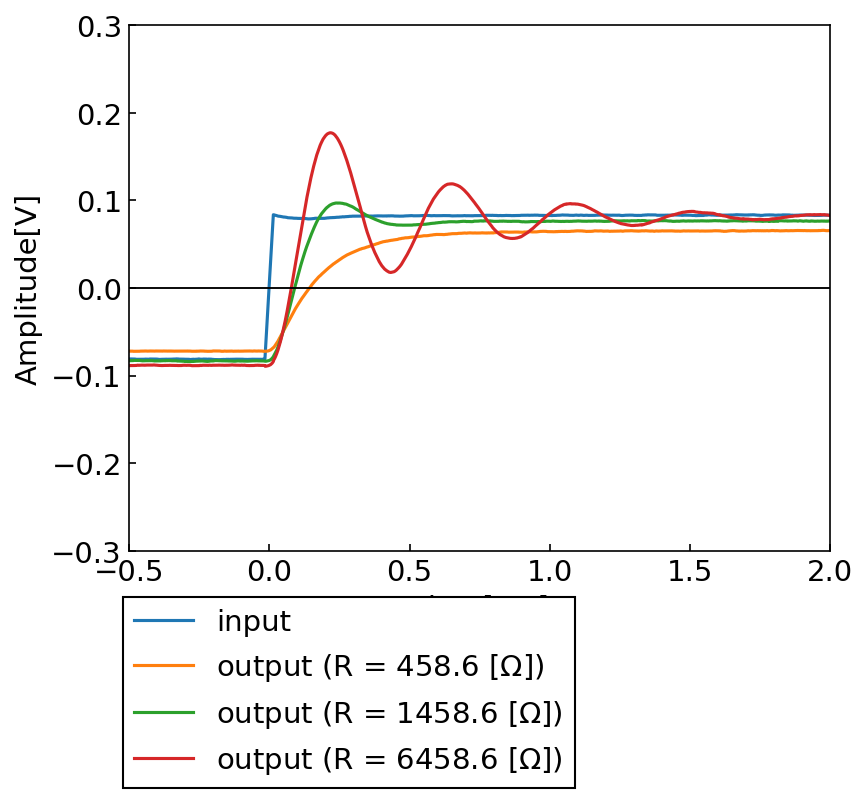

In [26]:
# データのCSVを見て、必要な部分（25行目よりあと、[0, 1, 3]列）を使う
filepath_eq ="/content/drive/MyDrive/Filter/6.2定K形フィルタにおける負荷の影響/同（1458.6）/A0001.CSV"
filepath_large ="/content/drive/MyDrive/Filter/6.2定K形フィルタにおける負荷の影響/大（6458.6）/A0001.CSV"
filepath_small ="/content/drive/MyDrive/Filter/6.2定K形フィルタにおける負荷の影響/小（458.6）/A0001.CSV"

data_eq = np.loadtxt(filepath_eq, delimiter=',', skiprows=26, usecols=[0, 1, 3])
data_large = np.loadtxt(filepath_large, delimiter=',', skiprows=26, usecols=[0, 3])
data_small = np.loadtxt(filepath_small, delimiter=',', skiprows=26, usecols=[0, 3])

# 分かりやすいように変数に代入しておく(Timeは共通)
time = data_eq[:, 0] * 1000 # 単位を[ms]にする

df_eq = pd.DataFrame(data_eq, columns=["time_eq", "in", "out_eq"])
df_large = pd.DataFrame(data_large, columns=["time_large", "out_large"])
df_small = pd.DataFrame(data_small, columns=["time_small", "out_small"])

#平均をとる
df_eq["in_rolling_mean"] = df_eq["in"].rolling(window=30, center=True).mean()
df_eq["out_eq_rolling_mean"] = df_eq["out_eq"].rolling(window=30, center=True).mean()
df_large["out_large_rolling_mean"] = df_large["out_large"].rolling(window=30, center=True).mean()
df_small["out_small_rolling_mean"] = df_small["out_small"].rolling(window=30, center=True).mean()

# プロット
#plt.plot(time, ei, label="$e_{i}$")
#plt.plot(time, eo, label="$e_{o}$")
plt.plot(time, df_eq["in_rolling_mean"], label="input")
plt.plot(time, df_small["out_small_rolling_mean"], label="output (R = 458.6 $[\Omega]$)")
plt.plot(time, df_eq["out_eq_rolling_mean"], label="output (R = 1458.6 $[\Omega]$)")
plt.plot(time, df_large["out_large_rolling_mean"], label="output (R = 6458.6 $[\Omega]$)")

# x軸、y軸のラベルをつける
plt.xlabel("Time[ms]")
plt.ylabel("Amplitude[V]")

# x, y軸の範囲を指定
plt.ylim(-0.3,0.3)
plt.xlim(-0.5,2)

# x軸の線を表示
plt.axhline(0, color='black', linewidth=0.90)

# 凡例を含めて表示
plt.legend(bbox_to_anchor=(-0.03,-0.06), loc='upper left')
plt.show()

# 6.3

## LC

5点の移動平均

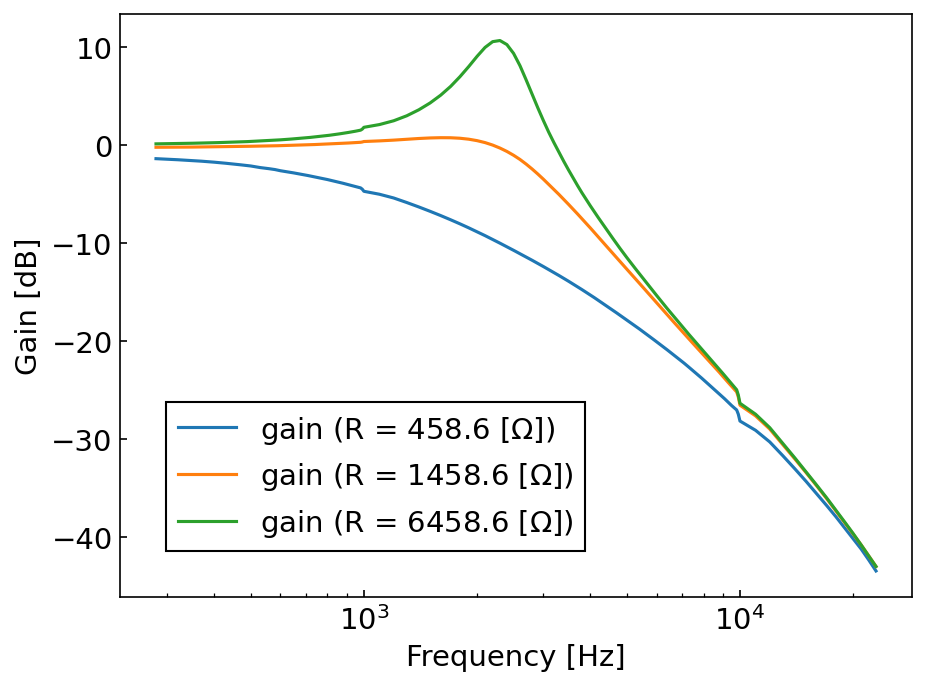

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データのCSVを見て、必要な部分を使う
filepath_eq ="/content/drive/MyDrive/Filter/6.3周波数特性の測定/LC 1458.CSV"
filepath_small ="/content/drive/MyDrive/Filter/6.3周波数特性の測定/LC 0458.CSV"
filepath_large ="/content/drive/MyDrive/Filter/6.3周波数特性の測定/LC 6458.CSV"

# それぞれ正しいファイルパスからデータを読み込むように修正
data_small = np.loadtxt(filepath_small, delimiter=',', skiprows=15, usecols=[0, 1, 2])
data_large = np.loadtxt(filepath_large, delimiter=',', skiprows=15, usecols=[0, 1, 2])
data_eq = np.loadtxt(filepath_eq, delimiter=',', skiprows=15, usecols=[0, 1, 2])

# 分かりやすいように変数に代入しておく
# x軸は周波数なので、`data_small`の0列目を使用
freq = data_small[:, 0]

# DataFrameを作成
df_small = pd.DataFrame(data_small, columns=["freq", "gain", "phase"])
df_large = pd.DataFrame(data_large, columns=["freq", "gain", "phase"])
df_eq = pd.DataFrame(data_eq, columns=["freq", "gain", "phase"])

#平均をとる
df_eq["gain_rolling_mean"] = df_eq["gain"].rolling(window=5, center=True).mean()
df_small["gain_rolling_mean"] = df_small["gain"].rolling(window=5, center=True).mean()
df_large["gain_rolling_mean"] = df_large["gain"].rolling(window=5, center=True).mean()


# x軸を対数スケールに設定
plt.xscale('log')


# プロット
plt.plot(freq, df_small["gain_rolling_mean"], label="gain (R = 458.6 $[\Omega]$)")
plt.plot(freq, df_eq["gain_rolling_mean"], label="gain (R = 1458.6 $[\Omega]$)")
plt.plot(freq, df_large["gain_rolling_mean"], label="gain (R = 6458.6 $[\Omega]$)")


# x軸、y軸のラベルをつける (x軸は単位を[Hz]に変更、y軸は"Phase"を削除)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Gain [dB]")


# x, y軸の範囲を指定
#plt.ylim(-0.7,0.7)
#plt.xlim(-1,4)


# 凡例を含めて表示
plt.legend(bbox_to_anchor=(0.04,0.36), loc='upper left')

# レイアウトを調整
plt.tight_layout()

plt.show()

遮断周波数

In [28]:
import numpy as np
import pandas as pd
import os

# --- データ読み込み ---
# Google Driveをマウントしている場合、パスのプレフィックスを設定
# ローカルで実行する場合は、この部分は不要です
drive_prefix = "/content/drive/MyDrive/"

# ファイルパスの定義 (実際の環境に合わせて修正してください)
# もしファイルが見つからないエラーが出る場合は、ここのパスが正しいか確認してください
filepath_eq = os.path.join(drive_prefix, "/content/drive/MyDrive/Filter/6.3周波数特性の測定/LC 1458.CSV")
filepath_small = os.path.join(drive_prefix, "/content/drive/MyDrive/Filter/6.3周波数特性の測定/LC 0458.CSV")
filepath_large = os.path.join(drive_prefix, "/content/drive/MyDrive/Filter/6.3周波数特性の測定/LC 6458.CSV")

# ファイルの存在を確認 (デバッグ用)
# for path in [filepath_small, filepath_large, filepath_eq]:
#     if not os.path.exists(path):
#         print(f"警告: ファイルが見つかりません: {path}")

try:
    # skiprows=15でデータ部分のみを読み込む
    # usecols=[0, 1, 2]で周波数、ゲイン、位相の列を指定
    data_small = np.loadtxt(filepath_small, delimiter=',', skiprows=15, usecols=[0, 1, 2])
    data_large = np.loadtxt(filepath_large, delimiter=',', skiprows=15, usecols=[0, 1, 2])
    data_eq = np.loadtxt(filepath_eq, delimiter=',', skiprows=15, usecols=[0, 1, 2])

    # DataFrameを作成してデータを整理
    df_small = pd.DataFrame(data_small, columns=["freq", "gain", "phase"])
    df_large = pd.DataFrame(data_large, columns=["freq", "gain", "phase"])
    df_eq = pd.DataFrame(data_eq, columns=["freq", "gain", "phase"])

    # --- データ処理 ---
    # ローリング平均（移動平均）を計算してノイズを平滑化
    # window=5は、中心の点を含めて前後2点ずつの計5点で平均を取る設定
    df_eq["gain_rolling_mean"] = df_eq["gain"].rolling(window=5, center=True).mean()
    df_small["gain_rolling_mean"] = df_small["gain"].rolling(window=5, center=True).mean()
    df_large["gain_rolling_mean"] = df_large["gain"].rolling(window=5, center=True).mean()


    # --- ゲインが-3dBに最も近い点を計算 ---

    # 1. 各データフレームで、ゲインと-3との差の絶対値を計算
    # 2. .idxmin() を使って、その絶対値が最小になる行のインデックス（index）を取得
    idx_small_3dB = (df_small['gain_rolling_mean'] - (-3)).abs().idxmin()
    idx_eq_3dB = (df_eq['gain_rolling_mean'] - (-3)).abs().idxmin()
    idx_large_3dB = (df_large['gain_rolling_mean'] - (-3)).abs().idxmin()

    # 3. .loc[] を使って、取得したインデックスに対応する行のデータを取得
    point_small_3dB = df_small.loc[idx_small_3dB]
    point_eq_3dB = df_eq.loc[idx_eq_3dB]
    point_large_3dB = df_large.loc[idx_large_3dB]

    # 4. 結果をコンソールに出力
    print("--- ゲインが-3dBに最も近い点 ---")
    print(f"R = 458.6 [Ω]:")
    print(f"  周波数: {point_small_3dB['freq']:.2f} Hz")
    print(f"  ゲイン: {point_small_3dB['gain_rolling_mean']:.4f} dB")
    print(f"  位相: {point_small_3dB['phase']:.4f} °\n") # この行を追加しました

    print(f"R = 1458.6 [Ω]:")
    print(f"  周波数: {point_eq_3dB['freq']:.2f} Hz")
    print(f"  ゲイン: {point_eq_3dB['gain_rolling_mean']:.4f} dB")
    print(f"  位相: {point_eq_3dB['phase']:.4f} °\n") # この行を追加しました

    print(f"R = 6458.6 [Ω]:")
    print(f"  周波数: {point_large_3dB['freq']:.2f} Hz")
    print(f"  ゲイン: {point_large_3dB['gain_rolling_mean']:.4f} dB")
    print(f"  位相: {point_large_3dB['phase']:.4f} °\n") # この行を追加しました

except FileNotFoundError as e:
    print(f"エラー: ファイルが見つかりません。")
    print(f"詳細: {e}")
    print("ファイルパスが正しいか、Google Driveがマウントされているか確認してください。")
except Exception as e:
    print(f"予期せぬエラーが発生しました: {e}")

--- ゲインが-3dBに最も近い点 ---
R = 458.6 [Ω]:
  周波数: 690.00 Hz
  ゲイン: -3.0137 dB
  位相: -42.3893 °

R = 1458.6 [Ω]:
  周波数: 2900.00 Hz
  ゲイン: -2.9492 dB
  位相: -112.0504 °

R = 6458.6 [Ω]:
  周波数: 3600.00 Hz
  ゲイン: -3.3553 dB
  位相: -163.3786 °



5点の移動平均

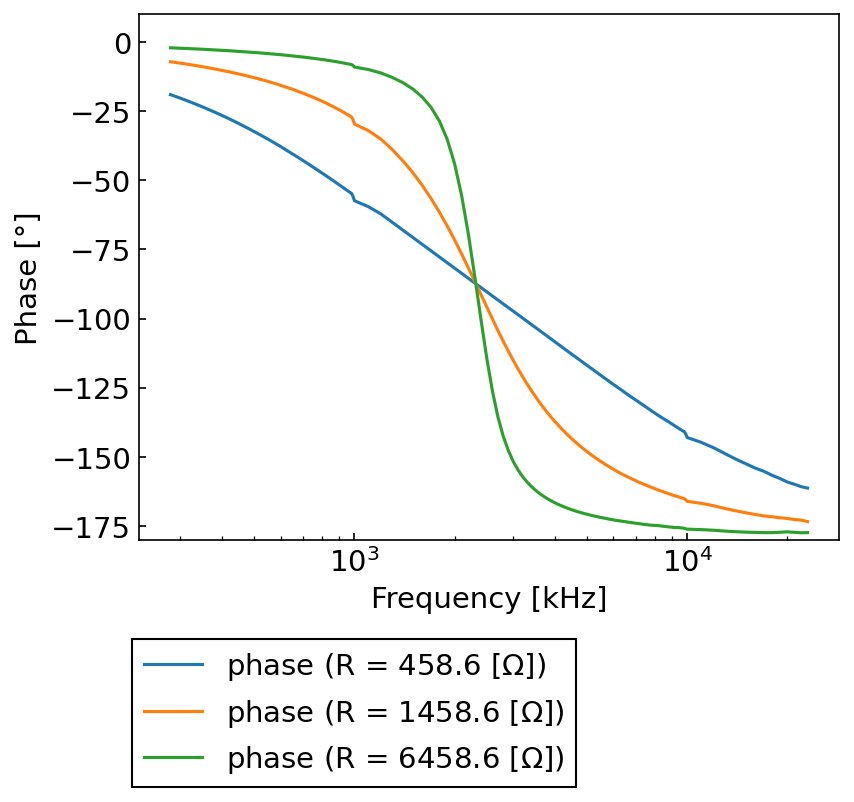

In [29]:
df_eq["phase_rolling_mean"] = df_eq["phase"].rolling(window=5, center=True).mean()
df_small["phase_rolling_mean"] = df_small["phase"].rolling(window=5, center=True).mean()
df_large["phase_rolling_mean"] = df_large["phase"].rolling(window=5, center=True).mean()

plt.plot(freq, df_small["phase_rolling_mean"], label="phase (R = 458.6 $[\Omega]$)")
plt.plot(freq, df_eq["phase_rolling_mean"], label="phase (R = 1458.6 $[\Omega]$)")
plt.plot(freq, df_large["phase_rolling_mean"], label="phase (R = 6458.6 $[\Omega]$)")

# x軸を対数スケールに設定
plt.xscale('log')

# x軸、y軸のラベルをつける
plt.xlabel("Frequency [kHz]")
plt.ylabel("Phase [°]")

# x, y軸の範囲を指定
plt.ylim(-180,10)
#plt.xlim(-1,4)

# 凡例を含めて表示
plt.legend(bbox_to_anchor=(-0.03,-0.16), loc='upper left')

# レイアウトを調整
#plt.tight_layout()

plt.show()

移動平均なし

## RC

Frequency,Gain,Phase,

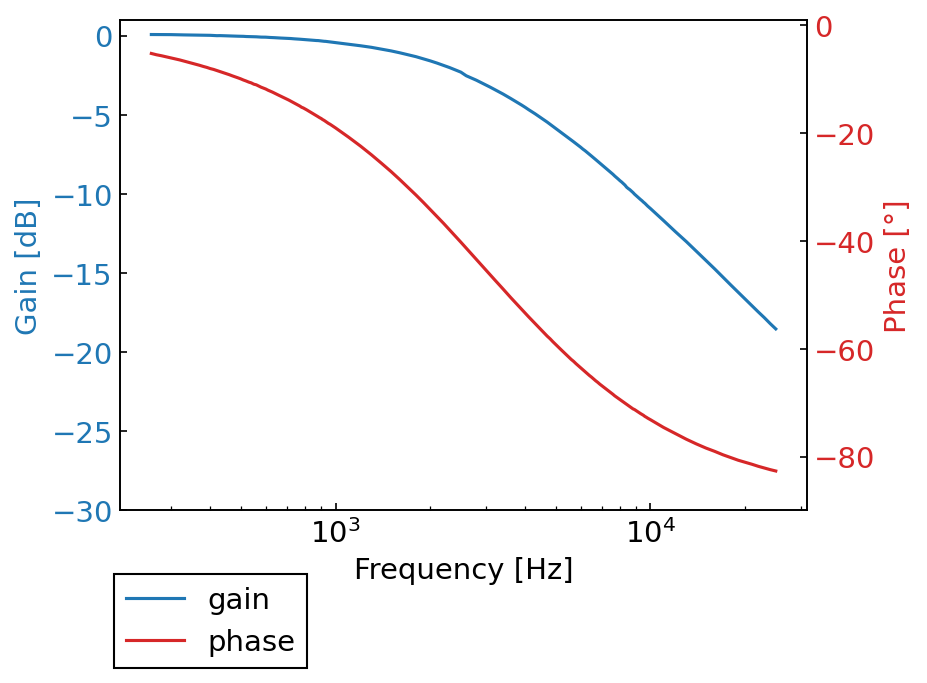

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データのCSVを見て、必要な部分を使う
filepath ="/content/drive/MyDrive/Filter/6.3周波数特性の測定/RC.CSV"
data = np.loadtxt(filepath, delimiter=',', skiprows=15, usecols=[0, 1, 2])

# DataFrameを作成
df = pd.DataFrame(data, columns=["freq", "gain", "phase"])

# 移動平均をとる
df["gain_rolling_mean"] = df["gain"].rolling(window=1, center=True).mean()
df["phase_rolling_mean"] = df["phase"].rolling(window=1, center=True).mean()

# --- 2軸グラフの描画 ---

# グラフ領域(fig)と最初の軸(ax1)を作成
fig, ax1 = plt.subplots()

# x軸を対数スケールに設定
ax1.set_xscale('log')

# 1つ目のy軸（左側、gain）の設定とプロット
color_gain = 'tab:blue'
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Gain [dB]", color=color_gain)
p1, = ax1.plot(df["freq"], df["gain_rolling_mean"], color=color_gain, label="gain")
ax1.tick_params(axis='y', labelcolor=color_gain)

# gainのy軸の範囲を指定
ax1.set_ylim(-30, 1)  # (下限, 上限) の値を調整してください

# 2つ目のy軸（右側、phase）を作成
ax2 = ax1.twinx()
color_phase = 'tab:red'
ax2.set_ylabel("Phase [°]", color=color_phase)
p2, = ax2.plot(df["freq"], df["phase_rolling_mean"], color=color_phase, label="phase")
ax2.tick_params(axis='y', labelcolor=color_phase)

# phaseのy軸の範囲を指定
ax2.set_ylim(-90, 1)  # (下限, 上限) の値を調整してください

# x軸の線を表示
# ax1.axhline(0, color='black', linewidth=0.90)

# 凡例をまとめて表示
lines = [p1, p2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, bbox_to_anchor=(-0.03,-0.1), loc='upper left')

# レイアウトを自動調整してラベルが重なるのを防ぐ
fig.tight_layout()

# グラフを表示
plt.show()

遮断周波数

In [41]:
import numpy as np
import pandas as pd
import os

# --- データ読み込み ---
# Google Driveをマウントしている場合、パスのプレフィックスを設定
# ローカルで実行する場合は、この部分は不要です
drive_prefix = "/content/drive/MyDrive/"

# ファイルパスの定義 (実際の環境に合わせて修正してください)
filepath = os.path.join(drive_prefix, "/content/drive/MyDrive/Filter/6.3周波数特性の測定/RC.CSV")

try:
    # skiprows=15でヘッダーをスキップし、データ部分のみを読み込む
    # usecols=[0, 1, 2]で周波数、ゲイン、位相の列を指定
    data = np.loadtxt(filepath, delimiter=',', skiprows=15, usecols=[0, 1, 2])

    # DataFrameを作成してデータを整理
    df = pd.DataFrame(data, columns=["freq", "gain", "phase"])

    # --- データ処理 ---
    # 移動平均を計算してノイズを平滑化
    # メモ: window=1は実質的に平均化を行いませんが、元のコードに合わせています。
    # ノイズが多い場合は、この値を大きくすると結果が安定します。
    df["gain_rolling_mean"] = df["gain"].rolling(window=1, center=True).mean()

    # NaN（Not a Number）値を持つ行を削除（rolling meanで発生する可能性があるため）
    df.dropna(subset=['gain_rolling_mean'], inplace=True)


    # --- ゲインが-3dBに最も近い点を計算 ---

    # 1. ゲインと-3との差の絶対値を計算
    # 2. .idxmin() を使って、その絶対値が最小になる行のインデックス（index）を取得
    idx_3dB = (df['gain_rolling_mean'] - (-3)).abs().idxmin()

    # 3. .loc[] を使って、取得したインデックスに対応する行のデータを取得
    point_3dB = df.loc[idx_3dB]

    # 4. 結果をコンソールに出力
    print("--- ゲインが-3dBに最も近い点 ---")
    print(f"周波数: {point_3dB['freq']:.2f} Hz")
    print(f"ゲイン: {point_3dB['gain_rolling_mean']:.4f} dB")
    print(f"位相: {point_3dB['phase']:.4f} °") # この行を追加しました

except FileNotFoundError:
    print(f"エラー: ファイルが見つかりません: {filepath}")
    print("ファイルパスが正しいか、Google Driveがマウントされているか確認してください。")
except Exception as e:
    print(f"予期せぬエラーが発生しました: {e}")

--- ゲインが-3dBに最も近い点 ---
周波数: 2900.00 Hz
ゲイン: -2.9726 dB
位相: -44.4349 °


## RL

Frequency,Gain,Phase,

3点の移動平均

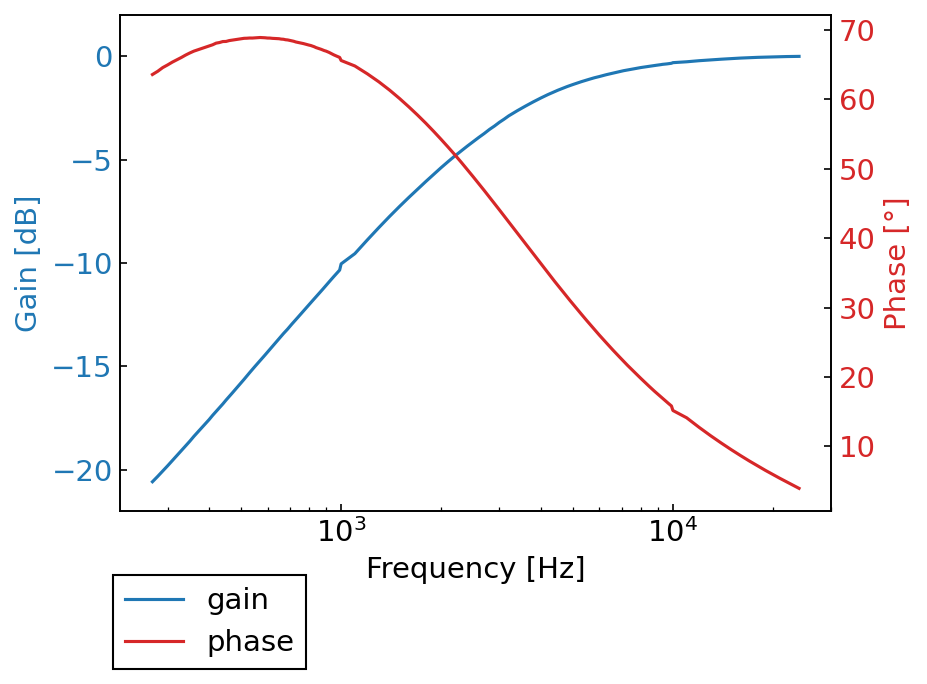

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データのCSVを見て、必要な部分を使う
filepath ="/content/drive/MyDrive/Filter/6.3周波数特性の測定/RL.CSV"
data = np.loadtxt(filepath, delimiter=',', skiprows=15, usecols=[0, 1, 2])

# DataFrameを作成
df = pd.DataFrame(data, columns=["freq", "gain", "phase"])

# 移動平均をとる
df["gain_rolling_mean"] = df["gain"].rolling(window=3, center=True).mean()
df["phase_rolling_mean"] = df["phase"].rolling(window=3, center=True).mean()

# --- 2軸グラフの描画 ---

# グラフ領域(fig)と最初の軸(ax1)を作成
fig, ax1 = plt.subplots()

# x軸を対数スケールに設定
ax1.set_xscale('log')

# 1つ目のy軸（左側、gain）の設定とプロット
color_gain = 'tab:blue'
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Gain [dB]", color=color_gain)
p1, = ax1.plot(df["freq"], df["gain_rolling_mean"], color=color_gain, label="gain")
ax1.tick_params(axis='y', labelcolor=color_gain)

# gainのy軸の範囲を指定
ax1.set_ylim(-22, 2)  # (下限, 上限) の値を調整してください

# 2つ目のy軸（右側、phase）を作成
ax2 = ax1.twinx()
color_phase = 'tab:red'
ax2.set_ylabel("Phase [°]", color=color_phase)
p2, = ax2.plot(df["freq"], df["phase_rolling_mean"], color=color_phase, label="phase")
ax2.tick_params(axis='y', labelcolor=color_phase)

# phaseのy軸の範囲を指定
#ax2.set_ylim(-90, 1)  # (下限, 上限) の値を調整してください

# x軸の線を表示
# ax1.axhline(0, color='black', linewidth=0.90)

# 凡例をまとめて表示
lines = [p1, p2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, bbox_to_anchor=(-0.03,-0.1), loc='upper left')

# レイアウトを自動調整してラベルが重なるのを防ぐ
fig.tight_layout()

# グラフを表示
plt.show()

遮断周波数

In [43]:
import numpy as np
import pandas as pd
import os

# --- データ読み込み ---
# Google Driveをマウントしている場合、パスのプレフィックスを設定
# ローカルで実行する場合は、この部分は不要です
drive_prefix = "/content/drive/MyDrive/"

# ファイルパスの定義 (実際の環境に合わせて修正してください)
filepath = os.path.join(drive_prefix, "/content/drive/MyDrive/Filter/6.3周波数特性の測定/RL.CSV")

try:
    # skiprows=15でヘッダーをスキップし、データ部分のみを読み込む
    # usecols=[0, 1, 2]で周波数、ゲイン、位相の列を指定
    data = np.loadtxt(filepath, delimiter=',', skiprows=15, usecols=[0, 1, 2])

    # DataFrameを作成してデータを整理
    df = pd.DataFrame(data, columns=["freq", "gain", "phase"])

    # --- データ処理 ---
    # 移動平均を計算してノイズを平滑化
    # メモ: window=1は実質的に平均化を行いませんが、元のコードに合わせています。
    # ノイズが多い場合は、この値を大きくすると結果が安定します。
    df["gain_rolling_mean"] = df["gain"].rolling(window=1, center=True).mean()

    # NaN（Not a Number）値を持つ行を削除（rolling meanで発生する可能性があるため）
    df.dropna(subset=['gain_rolling_mean'], inplace=True)


    # --- ゲインが-3dBに最も近い点を計算 ---

    # 1. ゲインと-3との差の絶対値を計算
    # 2. .idxmin() を使って、その絶対値が最小になる行のインデックス（index）を取得
    idx_3dB = (df['gain_rolling_mean'] - (-3)).abs().idxmin()

    # 3. .loc[] を使って、取得したインデックスに対応する行のデータを取得
    point_3dB = df.loc[idx_3dB]

    # 4. 結果をコンソールに出力
    print("--- ゲインが-3dBに最も近い点 ---")
    print(f"周波数: {point_3dB['freq']:.2f} Hz")
    print(f"ゲイン: {point_3dB['gain_rolling_mean']:.4f} dB")
    print(f"位相: {point_3dB['phase']:.4f} °") # この行を追加しました

except FileNotFoundError:
    print(f"エラー: ファイルが見つかりません: {filepath}")
    print("ファイルパスが正しいか、Google Driveがマウントされているか確認してください。")
except Exception as e:
    print(f"予期せぬエラーが発生しました: {e}")



--- ゲインが-3dBに最も近い点 ---
周波数: 3100.00 Hz
ゲイン: -3.0202 dB
位相: 43.1795 °
